In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

In [2]:
som=pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Soma results.xlsx", header=0, index_col=0)
som.head()


,HC 1,HC 2,ALS S1,ALS S2,ALS F1,ALS S3,HC 3,HC 4,ALS S4,HC 5,...,ALS S21,ALS F22,HC 25,ALS F23,ALS S22,ALS F24,ALS S23,HC 6,ALS F25,ALS S24
Gene name,,,,,,,,,,,,,,,,,,,,,
NEFL,2269.1,221.6,343.8,301.1,283.6,302.9,233.6,214.9,253.0,529.3,...,272.8,274.0,347.4,404.1,238.5,323.0,349.1,312.1,232.4,233.2
CHIT1,1400.3,1555.5,2055.3,1346.7,971.4,2752.7,1346.1,736.7,1421.0,3755.3,...,1092.5,5255.4,1033.5,297.2,952.0,901.5,894.7,1719.8,2007.7,1041.7
MPZ,1781.2,1039.1,1174.6,974.8,1031.7,932.6,1959.6,1217.4,1027.9,707.9,...,786.7,894.6,1068.8,1049.1,1264.8,1094.9,1408.4,808.8,956.3,1408.9
GRIA4,3457.8,3768.6,2770.5,3439.6,2608.8,2955.4,2169.2,3565.3,2232.5,1992.9,...,2943.5,3397.9,2309.0,2927.2,3282.2,2893.5,4667.4,2459.0,2485.6,5034.1
PLD3,418.4,750.4,484.0,1208.1,1159.7,490.1,583.7,283.9,432.0,439.8,...,435.7,627.8,535.0,453.4,648.4,652.9,507.6,544.4,660.3,595.6


In [3]:
som.shape

(100, 74)

In [10]:
#those are the 27 genes derived from the ANSWER ALS dataset. the rest of the 73 proteins derived from the human studies. 
#to check if the proteins from the human studies behave differently than the HS PCA will be preformed
pca_genes = [
    "BCL2L1", "CREB1", "SIGMAR1", "DPP6", "ATCAY", "MFAP1", "PDIA3", "IGF2BP3",
    "RTRAF", "UBA6", "UBXN4", "DHX32", "ARPC4", "BCAT2", "ERGIC1", "SLC25A13",
    "MYG1", "NUDT16L1", "AASDHPPT", "BSCL2", "RPN2", "UBE2V1", "DAZAP1",
    "PQBP1", "DNAJB2", "TBC1D13", "TFG"
]

# Split data
cell_lines_df = som.loc[som.index.intersection(pca_genes)]
human_studies_df = som.drop(index=pca_genes, errors='ignore')


In [11]:
# Scale (transpose so samples are rows) 
cell_lines_scaled = StandardScaler().fit_transform(cell_lines_df.T) 
human_studies_scaled = StandardScaler().fit_transform(human_studies_df.T)

# Run PCA
pca = PCA(n_components=2)
cell_pca = pca.fit_transform(cell_lines_scaled)
human_pca = pca.fit_transform(human_studies_scaled)


In [9]:
print(cell_lines_df.shape)
print(human_studies_df.shape)


(100, 74)
(0, 74)


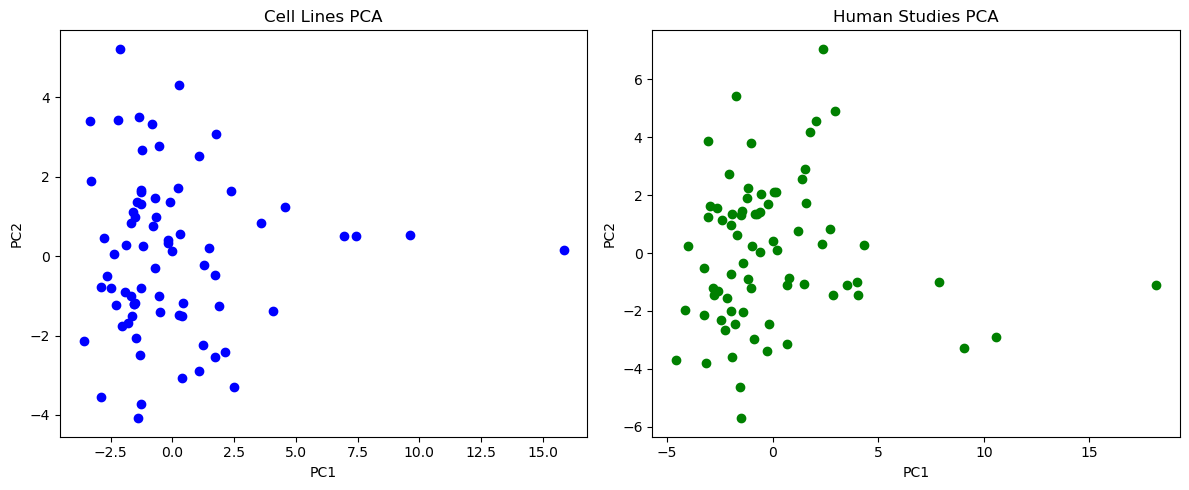

In [6]:

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(cell_pca[:, 0], cell_pca[:, 1], color='blue')
axs[0].set_title("Cell Lines PCA")
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")

axs[1].scatter(human_pca[:, 0], human_pca[:, 1], color='green')
axs[1].set_title("Human Studies PCA")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")

plt.tight_layout()
plt.show()


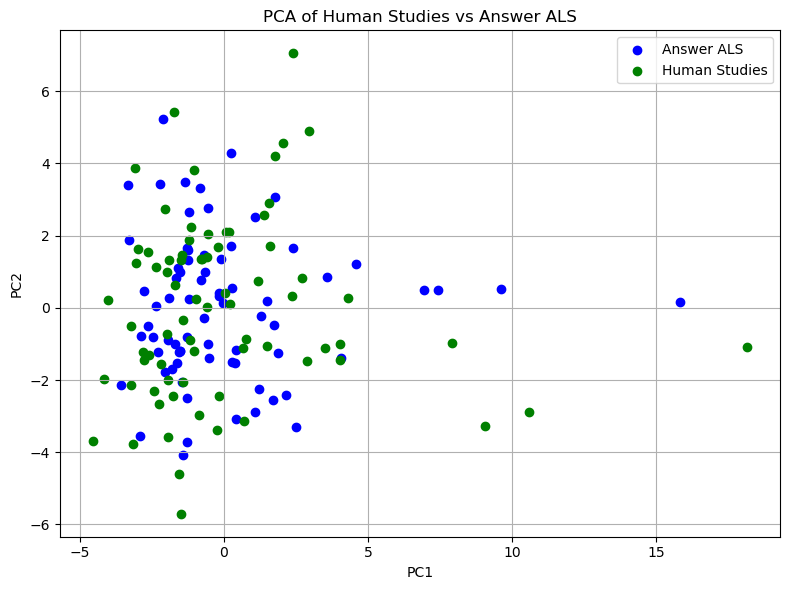

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_genes = [
    "BCL2L1", "CREB1", "SIGMAR1", "DPP6", "ATCAY", "MFAP1", "PDIA3", "IGF2BP3",
    "RTRAF", "UBA6", "UBXN4", "DHX32", "ARPC4", "BCAT2", "ERGIC1", "SLC25A13",
    "MYG1", "NUDT16L1", "AASDHPPT", "BSCL2", "RPN2", "UBE2V1", "DAZAP1",
    "PQBP1", "DNAJB2", "TBC1D13", "TFG"
]

# Split data
cell_lines_df = som.loc[som.index.intersection(pca_genes)]
human_studies_df = som.drop(index=pca_genes, errors='ignore')

# Scale (transpose so samples are rows)
cell_lines_scaled = StandardScaler().fit_transform(cell_lines_df.T)
human_studies_scaled = StandardScaler().fit_transform(human_studies_df.T)

# PCA
pca = PCA(n_components=2)
cell_pca = pca.fit_transform(cell_lines_scaled)
human_pca = pca.fit_transform(human_studies_scaled)

# Combined plot
plt.figure(figsize=(8, 6))

plt.scatter(cell_pca[:, 0], cell_pca[:, 1], color='blue', label='Answer ALS')
plt.scatter(human_pca[:, 0], human_pca[:, 1], color='green', label='Human Studies')

plt.title("PCA of Human Studies vs Answer ALS")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


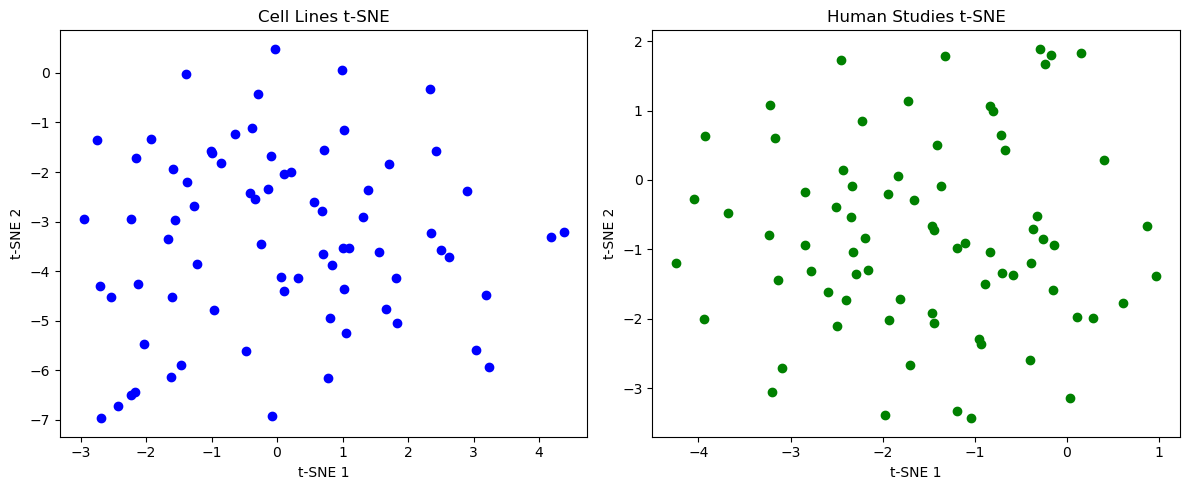

C:\Users\Client\anaconda3\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


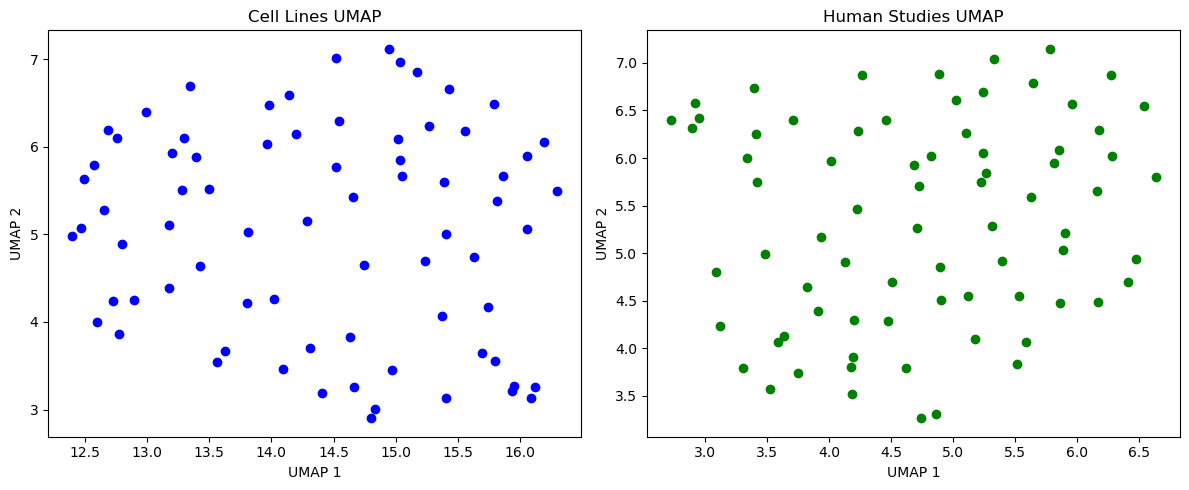

In [9]:
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


pca_genes = [
    "BCL2L1", "CREB1", "SIGMAR1", "DPP6", "ATCAY", "MFAP1", "PDIA3", "IGF2BP3",
    "RTRAF", "UBA6", "UBXN4", "DHX32", "ARPC4", "BCAT2", "ERGIC1", "SLC25A13",
    "MYG1", "NUDT16L1", "AASDHPPT", "BSCL2", "RPN2", "UBE2V1", "DAZAP1",
    "PQBP1", "DNAJB2", "TBC1D13", "TFG"
]
# --- Split data ---
cell_lines_df = som.loc[som.index.intersection(pca_genes)]
human_studies_df = som.drop(index=pca_genes, errors='ignore')

# --- Scale (transpose so samples are rows) ---
cell_scaled = StandardScaler().fit_transform(cell_lines_df.T)
human_scaled = StandardScaler().fit_transform(human_studies_df.T)

# ============================================================
# ✅ FIGURE 1 — t‑SNE
# ============================================================

tsne = TSNE(n_components=2, random_state=42)

cell_tsne = tsne.fit_transform(cell_scaled)
human_tsne = tsne.fit_transform(human_scaled)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(cell_tsne[:, 0], cell_tsne[:, 1], color='blue')
axs[0].set_title("Cell Lines t-SNE")
axs[0].set_xlabel("t-SNE 1")
axs[0].set_ylabel("t-SNE 2")

axs[1].scatter(human_tsne[:, 0], human_tsne[:, 1], color='green')
axs[1].set_title("Human Studies t-SNE")
axs[1].set_xlabel("t-SNE 1")
axs[1].set_ylabel("t-SNE 2")

plt.tight_layout()
plt.show()

# ============================================================
# ✅ FIGURE 2 — UMAP
# ============================================================

um = umap.UMAP(n_components=2, random_state=42)

cell_umap = um.fit_transform(cell_scaled)
human_umap = um.fit_transform(human_scaled)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(cell_umap[:, 0], cell_umap[:, 1], color='blue')
axs[0].set_title("Cell Lines UMAP")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")

axs[1].scatter(human_umap[:, 0], human_umap[:, 1], color='green')
axs[1].set_title("Human Studies UMAP")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")

plt.tight_layout()
plt.show()


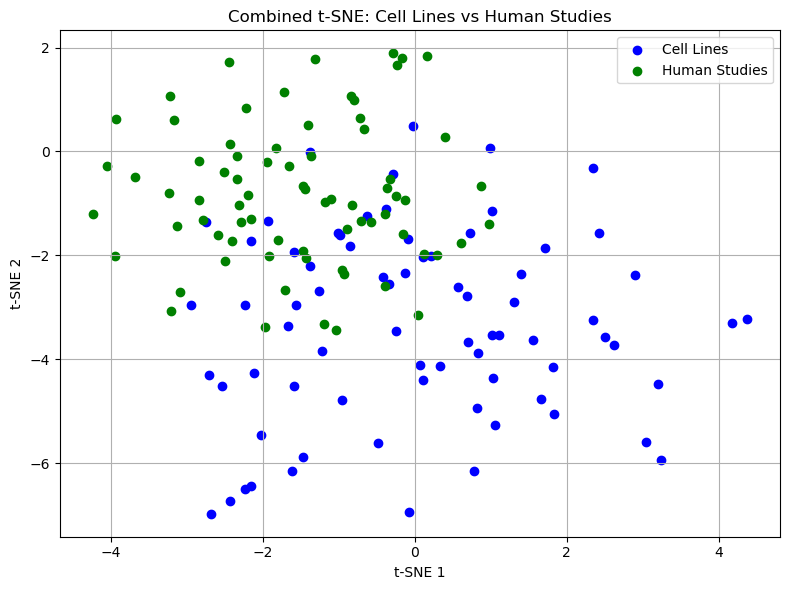

In [10]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)

cell_tsne = tsne.fit_transform(cell_lines_scaled)
human_tsne = tsne.fit_transform(human_studies_scaled)

# Combined plot
plt.figure(figsize=(8, 6))

plt.scatter(cell_tsne[:, 0], cell_tsne[:, 1], color='blue', label='Cell Lines')
plt.scatter(human_tsne[:, 0], human_tsne[:, 1], color='green', label='Human Studies')

plt.title("Combined t-SNE: Cell Lines vs Human Studies")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Client\anaconda3\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


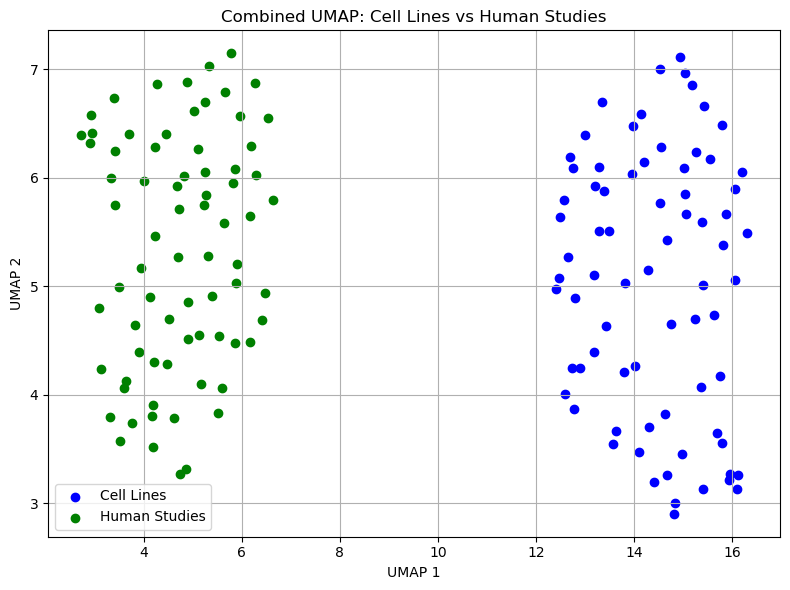

In [11]:

# UMAP
um = umap.UMAP(n_components=2, random_state=42)

cell_umap = um.fit_transform(cell_lines_scaled)
human_umap = um.fit_transform(human_studies_scaled)

# Combined plot
plt.figure(figsize=(8, 6))

plt.scatter(cell_umap[:, 0], cell_umap[:, 1], color='blue', label='Cell Lines')
plt.scatter(human_umap[:, 0], human_umap[:, 1], color='green', label='Human Studies')

plt.title("Combined UMAP: Cell Lines vs Human Studies")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
